In [132]:
import xarray as xr
from cmocean import cm as cmo
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [133]:
ds = xr.open_dataset('sg579_EUREC4A_1.0m_up_and_down_profile.nc')
ds

<xarray.Dataset>
Dimensions:               (depth: 1007, profile: 590, trajectory: 590)
Coordinates:
  * trajectory            (trajectory) int32 1 1 2 2 3 3 ... 293 294 294 295 295
    longitude             (profile) float64 ...
    latitude              (profile) float64 ...
  * depth                 (depth) float64 1.0 2.0 3.0 ... 1.006e+03 1.007e+03
    ctd_time              (profile, depth) datetime64[ns] ...
    ctd_depth             (profile, depth) float64 ...
Dimensions without coordinates: profile
Data variables:
    year                  (profile) float64 ...
    time                  (profile) datetime64[ns] ...
    theta                 (profile, depth) float64 ...
    temperature_raw       (profile, depth) float64 ...
    temperature           (profile, depth) float64 ...
    start_time            (profile) datetime64[ns] ...
    start_longitude       (profile) float64 ...
    start_latitude        (profile) float64 ...
    sound_velocity        (profile, depth) float64 ...
    sigma_theta           (profile, depth) float64 ...
    sigma_t               (profile, depth) float64 ...
    salinity_raw          (profile, depth) float64 ...
    salinity              (profile, depth) float64 ...
    pressure              (profile, depth) float64 ...
    month                 (profile) float64 ...
    longitude_gsm         (profile, depth) float64 ...
    log_gps_time          (profile, depth) datetime64[ns] ...
    latlong_qc            (profile) |S1 ...
    latitude_gsm          (profile, depth) float64 ...
    hour                  (profile) float64 ...
    glider                |S12 ...
    eng_wlbbfl2_temp      (profile, depth) float64 ...
    eng_wlbbfl2_FL2sig    (profile, depth) float64 ...
    eng_wlbbfl2_FL2ref    (profile, depth) float64 ...
    eng_wlbbfl2_FL1sig    (profile, depth) float64 ...
    eng_wlbbfl2_FL1ref    (profile, depth) float64 ...
    eng_wlbbfl2_BB1sig    (profile, depth) float64 ...
    eng_wlbbfl2_BB1ref    (profile, depth) float64 ...
    eng_qsp_PARuV         (profile, depth) float64 ...
    eng_aa4330_Temp       (profile, depth) float64 ...
    eng_aa4330_O2         (profile, depth) float64 ...
    end_time              (profile) datetime64[ns] ...
    end_longitude         (profile) float64 ...
    end_latitude          (profile) float64 ...
    dive_number           (profile) int32 ...
    dissolved_oxygen_sat  (profile, depth) float64 ...
    depth_avg_curr_qc     (profile) |S1 ...
    depth_avg_curr_north  (profile) float64 ...
    depth_avg_curr_east   (profile) float64 ...
    density_insitu        (profile, depth) float64 ...
    density               (profile, depth) float64 ...
    dd                    (profile) float64 ...
    date                  (profile) float64 ...
    ctd_pressure          (profile, depth) float64 ...
    conductivity_raw      (profile, depth) float64 ...
    conductivity          (profile, depth) float64 ...
    bin_time              (profile, depth) datetime64[ns] ...
Attributes:
    quality_control_version:         1.12
    base_station_micro_version:      4475
    time_coverage_resolution:        PT1S
    geospatial_vertical_max:         1006.1187768782487
    binwidth:                        1.0
    mission:                         60
    geospatial_lat_units:            degrees
    geospatial_lon_units:            degrees
    references:                      http://data.nodc.noaa.gov/accession/0092291
    seaglider_software_version:      66.12
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    keywords:                        Water Temperature, Conductivity, Salinit...
    summary:                         SG579 EUREC4A
    id:                              Profile_SG579_20200216_20200216_up_and_d...
    naming_authority:                edu.washington.apl
    project:                         EUREC4A
    geospatial_lat_max:              14.228516126138203
    uuid:                            10a49508-50c6-11ea-bac7-94188277d9d8

In [164]:
profile_time = ds.ctd_time.mean(axis=1).data # average time per profile
ds = ds.assign_coords(profile_time=("profile", profile_time)) # assign this as a new coordinate called profile_time
ds.profile_time.attrs =  {'comment': 'Mean time of CTD profile', # add essential metadata, or xarray won't plot it
 'standard_name': 'time',
 'axis': 'profile'}

In [194]:
# define a basic plotting function for the profiles
def plotter(variable,colourmap,title):
    fig, ax = plt.subplots()
    #xr.plot.pcolormesh(darray = ds, x = 'profile_time', y = 'depth', z = variable, cmap = colourmap)
    ds[variable].T.plot(yincrease=False, y="depth", x="profile_time", cmap = colourmap)
    ax.set_title(str(title))
    plt.tight_layout()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m')) # sets x tick format
    return fig, ax

In [166]:
a = list(ds.keys()) # list data variables in ds

In [167]:
# list of variables from old matlab script that may come from glider
glider_variables = ('temp','temperature','conductivity','salinity','sigma_theta','dissolved_oxygen_sat',
'eng_aa4330_O2','eng_aa4330F_O2','eng_aa1_O2','eng_aa807_O2','eng_aa4831_O2','contopt_instrument_dissolved_oxygen','contopt_dissolved_oxygen',
'eng_aa4330_Temp','eng_aa4330F_Temp','eng_aa1_Temp','eng_aa807_Temp','eng_aa4831_Temp','eng_contopt_Temp', 'eng_contopt_pO2',
'eng_wl_sig1','eng_wl1_sig1','eng_wl_Chlsig1','eng_wl1_Chlsig1','eng_wl_Cdomsig1','eng_wl1_Cdomsig1',
'eng_phfl_raw_data','eng_phfl_pHcalib','eng_phfl_Temp',
'eng_ph_pH','eng_ph_pCO2','eng_ph_temp_pH',
'eng_qsp144_PARuV','eng_qsp1_PARuV','eng_qsp_PARuV','eng_qsp_PARuV','eng_qsp1_PARuv',
'eng_wlbbfl2vmt_wl600sig','eng_wlbbfl2vmt_wl650sig','eng_wlbbfl2vmt_Cdomsig','eng_wlbbfl2vmt_Chlsig',
'eng_wl1_sig1','eng_wl1_Chlsig1','eng_wl1_Cdomsig1',
'eng_wl836_sig1','eng_wl836_Chlsig1','eng_wl836_Cdomsig1',
'eng_wlbb2fl_BB1sig','eng_wlbb2fl_BB2sig','eng_wlbb2fl_FL1sig',
'eng_wlbbfl2_BB1sig','eng_wlbbfl2_FL1sig','eng_wlbbfl2_FL2sig',
'eng_wlseaowl_FL1sig','eng_wlseaowl_BB1sig','eng_wlseaowl_FDOMsig')

In [205]:
#create dictionary to match each variable in glider_variables to a colourmap
dict = {'temp':cmo.thermal,'temperature':cmo.thermal,'conductivity':cmo.haline,'salinity':cmo.haline,'sigma_theta':cmo.dense,'dissolved_oxygen_sat':cmo.oxy,
'eng_aa4330_O2':cmo.oxy,'eng_aa4330F_O2':cmo.oxy,'eng_aa1_O2':cmo.oxy,'eng_aa807_O2':cmo.oxy,'eng_aa4831_O2':cmo.oxy,
'contopt_instrument_dissolved_oxygen':cmo.oxy,'contopt_dissolved_oxygen':cmo.oxy,
'eng_aa4330_Temp':cmo.thermal,'eng_aa4330F_Temp':cmo.thermal,'eng_aa1_Temp':cmo.thermal,'eng_aa807_Temp':cmo.thermal,'eng_aa4831_Temp':cmo.thermal,
'eng_contopt_Temp':cmo.thermal, 'eng_contopt_pO2':cmo.oxy, 'eng_wl_sig1': cmo.gray,'eng_wl1_sig1': cmo.gray,'eng_wl_Chlsig1': cmo.algae,
'eng_wl1_Chlsig1': cmo.algae,'eng_wl_Cdomsig1': cmo.gray,'eng_wl1_Cdomsig1': cmo.gray,
'eng_phfl_raw_data': cmo.gray,'eng_phfl_pHcalib': cmo.gray,'eng_phfl_Temp': cmo.gray,
'eng_ph_pH': cmo.gray,'eng_ph_pCO2': cmo.gray,'eng_ph_temp_pH': cmo.gray,
'eng_qsp144_PARuV': cmo.gray,'eng_qsp1_PARuV': cmo.gray,'eng_qsp_PARuV': cmo.gray,'eng_qsp_PARuV': cmo.gray,'eng_qsp1_PARuv': cmo.gray,
'eng_wlbbfl2vmt_wl600sig': cmo.gray,'eng_wlbbfl2vmt_wl650sig': cmo.gray,'eng_wlbbfl2vmt_Cdomsig': cmo.gray,'eng_wlbbfl2vmt_Chlsig': cmo.gray,
'eng_wl1_sig1': cmo.gray,'eng_wl1_Chlsig1': cmo.gray,'eng_wl1_Cdomsig1': cmo.gray,
'eng_wl836_sig1': cmo.gray,'eng_wl836_Chlsig1': cmo.gray,'eng_wl836_Cdomsig1': cmo.gray,
'eng_wlbb2fl_BB1sig': cmo.gray,'eng_wlbb2fl_BB2sig': cmo.gray,'eng_wlbb2fl_FL1sig': cmo.gray,
'eng_wlbbfl2_BB1sig': cmo.gray,'eng_wlbbfl2_FL1sig': cmo.gray,'eng_wlbbfl2_FL2sig': cmo.gray,
'eng_wlseaowl_FL1sig': cmo.gray,'eng_wlseaowl_BB1sig': cmo.gray,'eng_wlseaowl_FDOMsig': cmo.gray}

In [206]:
to_plot  = list(set(a).intersection(glider_variables)) # find elements in glider_variables relevant to this dataset

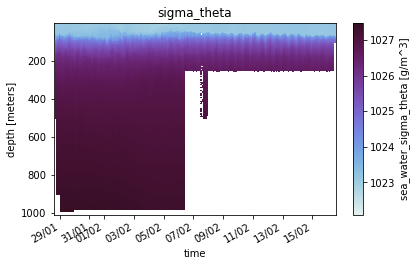

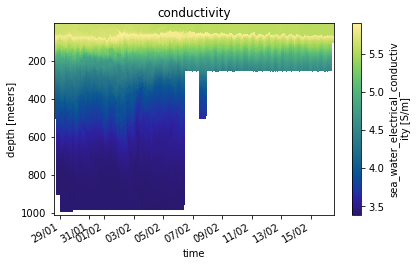

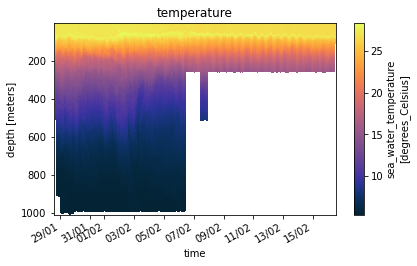

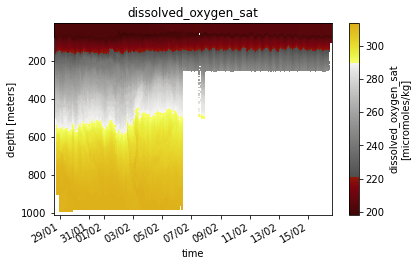

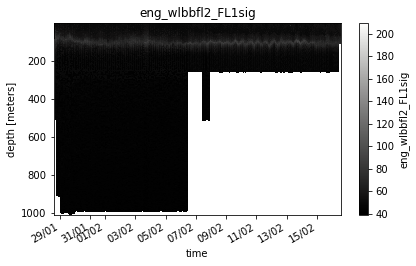

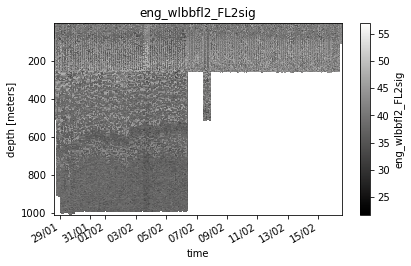

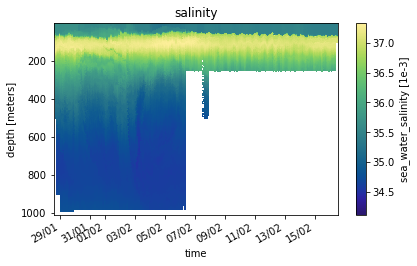

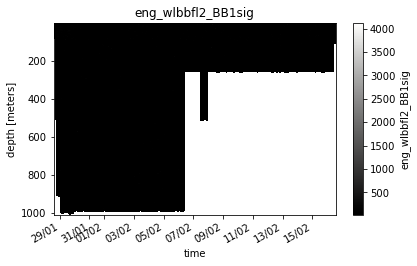

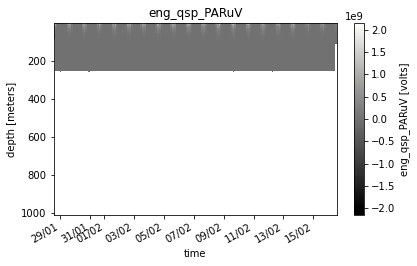

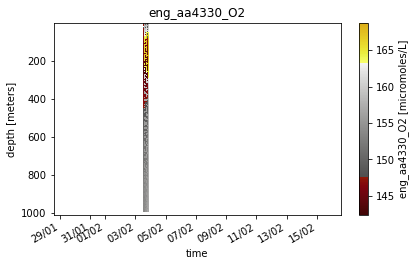

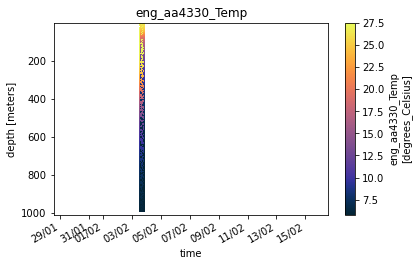

In [207]:
for i in range(len(to_plot)):
    plotter(to_plot[i], dict[to_plot[i]], to_plot[i])